# Lab 1

Anthony Marcozzi
Sean McNulty
Ed Shokur

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Part 1

We apply Baye's rule to probability of having covid given a true test. We take the likeliness to be 70% and the prior to be 0.7%. Our key insight is in breaking the evidence term in the denominator into two terms using the sum and product rules. The denominator is then a sum of the probability of a true test given covid positive times the prior, plus the probability of a true test given covid negative times the complement of the prior. Using this equation, we can now estimate the posterior belief of having covid given a positive test.

In [1]:
# Probabilities
likeliness = 7/10
prior = 7/1000
specifity = 2/100

In [2]:
def analysis(likeliness, prior, specifity):
    n = (likeliness * prior)
    d = likeliness * prior + specifity * (1- prior)
    return n / d

In [3]:
posterior = analysis(likeliness, prior, specifity)
print(posterior)

0.1978998384491115


# Part 2

In [12]:
spef_array = np.linspace(0, 1, 1000)
result = []
for i in range(1000):
    spef = spef_array[i]
    posterior = analysis(likeliness, prior, spef)
    result.append(posterior)

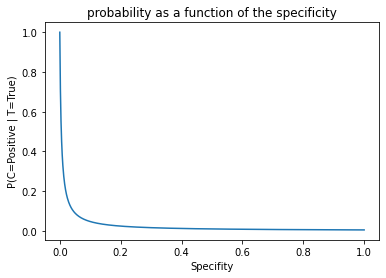

In [18]:
# Plot the results
plt.plot(spef_array, result)
plt.title('probability as a function of the specificity')
plt.xlabel('Specifity')
plt.ylabel('P(C=Positive | T=True)')
plt.show()

### Interpretation
This seems like a sensical result. As the specifictiy increases, then the probability of a true positive decreases. 

# Part 3

We make the observation that a covid test provides additional data about the probability of having covid. Thus, we can use additional tests to update our prior by substituting the value of our previous posterior.

In [33]:
posteriors = []

posteriors.append(analysis(likeliness, prior, specifity))
for i in range(1, 5):
    posteriors.append(analysis(likeliness, posteriors[i-1], specifity))

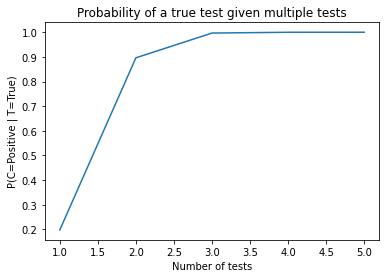

In [36]:
plt.plot(range(1, 6), posteriors)
plt.xlabel('Number of tests')
plt.ylabel('P(C=Positive | T=True)')
plt.title('Probability of a true test given multiple tests')
plt.show()